In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy
#%matplotlib inline
import os
import time
from scipy.integrate import simps
from scipy import interpolate
from scipy import optimize
from scipy import stats
eta = 0.17
T_obs = 86400.0 * 365.0 * 10.0 * eta

In [2]:
# Fermi-LAT best fit intrinsic spectrum without oscillations
fermi = np.loadtxt('Fermi-LAT-intrinsic-spectrum-without-oscillations.txt')
fermi[:,0] = fermi[:,0] * 1.0e+03 # GeV -> MeV
fermi[:,1] = fermi[:,1] * (fermi[:,0])**(-2) # Mev^{-1} cm^{-2} s^{-1}
fermi_log_energy = np.log10(fermi[:,0])
fermi_log_spectrum = np.log10(fermi[:,1])
fermi_min = np.min(fermi[:,0])
fermi_max = np.max(fermi[:,0])
###################################################################################################
fermi_intrinsic_support = interpolate.interp1d(fermi_log_energy, fermi_log_spectrum,
                                               kind='linear', bounds_error = False,
                                               fill_value = 'extrapolate')
def fermi_intrinsic(E): # [E] = MeV
#     if np.min(E) <= fermi_min:
#         Emin = fermi_min
#     else:
#         Emin = np.min(E)
#     if np.max(E) >= fermi_max:
#         Emax = fermi_max
#     else:
#         Emax = np.max(E)
#     x = np.linspace(np.log10(Emin), np.log10(Emax), E.shape[0]) # this is log10(E)
    x = np.log10(E)
    return 10.0**fermi_intrinsic_support(x) # Mev^{-1} cm^{-2} s^{-1}

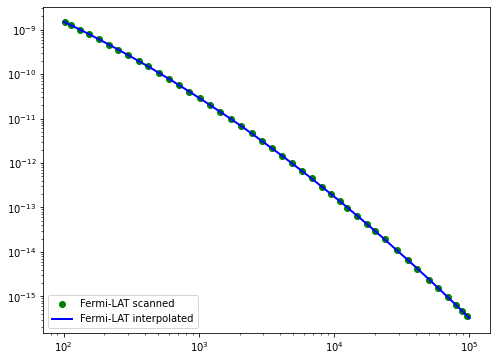

In [3]:
E = np.logspace(2, 5, 1000)
FERMI = fermi_intrinsic(E)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(fermi[:,0], fermi[:,1],
         marker = 'o',
         linewidth = 0,
         color = 'g',
         label = 'Fermi-LAT scanned')

plt.plot(E, FERMI,
         marker = None,
         linewidth = 2,
         color = 'b',
         label = 'Fermi-LAT interpolated')


plt.xscale("log")
plt.yscale("log")

#ax.set_xlim(1.0e+04, 1.0e+05)
#ax.set_ylim(1.0e-09, 1.0e-07)
# ax.grid()
plt.legend(loc = 'lower left')
# fig.savefig('fermi-intrinsic.pdf')

plt.show()

In [4]:
# Gamma-ALP modification factor by T. A.
modif = np.loadtxt('modification_factor_v3.txt')
modif[:,0] = modif[:,0] * 1.0e-06 # eV -> MeV
# modif[:,1] = modif[:,1] / np.max(modif[:,1]) # eliminate probability > 1
modif_log_energy = np.log10(modif[:,0])
###################################################################################################
modif_support = interpolate.interp1d(modif_log_energy, modif[:,1], kind='linear',
                                     bounds_error = False,
                                     fill_value = 'extrapolate')
def modification_factor(E): # [E] = MeV
#     if np.min(E) <= fermi_min:
#         Emin = fermi_min
#     else:
#         Emin = np.min(E)
#     if np.max(E) >= fermi_max:
#         Emax = fermi_max
#     else:
#         Emax = np.max(E)
#     x = np.linspace(np.log10(Emin), np.log10(Emax), E.shape[0]) # this is log10(E)
    x = np.log10(E)
    return modif_support(x) # probability

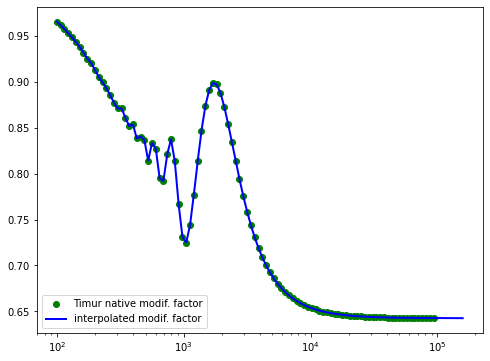

In [5]:
E = np.logspace(2, 5.2, 1000)
P = modification_factor(E)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(modif[:,0], modif[:,1],
         marker = 'o',
         linewidth = 0,
         color = 'g',
         label = 'Timur native modif. factor')

plt.plot(E, P,
         marker = None,
         linewidth = 2,
         color = 'b',
         label = 'interpolated modif. factor')


plt.xscale("log")
# plt.yscale("log")

#ax.set_xlim(1.0e+04, 1.0e+05)
#ax.set_ylim(1.0e-09, 1.0e-07)
# ax.grid()
plt.legend(loc = 'lower left')
# fig.savefig('time-dependence.pdf')

plt.show()

In [6]:
# MAST effective area
area = np.loadtxt('MAST_effective_area.txt')
area[:,1] = area[:,1] * 1.0e+04 # m^2 -> cm^2
area_log_energy = np.log10(area[:,0])
area_log_area = np.log10(area[:,1])
###################################################################################################
area_support = interpolate.interp1d(area_log_energy, area_log_area, kind='linear',
                                    bounds_error = False,
                                    fill_value = 'extrapolate')
def MAST_effective_area(E): # [E] = MeV
#     if np.min(E) <= fermi_min:
#         Emin = fermi_min
#     else:
#         Emin = np.min(E)
#     if np.max(E) >= fermi_max:
#         Emax = fermi_max
#     else:
#         Emax = np.max(E)
#     x = np.linspace(np.log10(Emin), np.log10(Emax), E.shape[0]) # this is log10(E)
    x = np.log10(E)
    return 10.0**area_support(x) # cm^2

In [7]:
# E = np.logspace(2, 4.95, 1000)
# S = MAST_effective_area(E)
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(1, 1, 1)

# plt.plot(area[:,0], area[:,1],
#          marker = 'o',
#          linewidth = 0,
#          color = 'g',
#          label = 'native MAST eff. area')

# plt.plot(E, S,
#          marker = None,
#          linewidth = 2,
#          color = 'b',
#          label = 'interpolated MAST eff. area')


# plt.xscale("log")
# plt.yscale("log")

# #ax.set_xlim(1.0e+04, 1.0e+05)
# #ax.set_ylim(1.0e-09, 1.0e-07)
# # ax.grid()
# plt.legend(loc = 'lower right')
# # fig.savefig('time-dependence.pdf')

# plt.show()

In [8]:
# MAST energy resolution
# en_res = np.loadtxt('MAST_energy_resolution.txt')
en_res = np.loadtxt('NN_energy_resolution_v9-3000-36cm-bootstrap.txt')
en_res[:,0] = en_res[:,0] * 1.0e-06
en_res_log_energy = np.log10(en_res[:,0])
###################################################################################################
en_res_support = interpolate.interp1d(en_res_log_energy, en_res[:,1], kind='cubic',
                                      bounds_error = False,
                                      fill_value = 'extrapolate')
def MAST_energy_resolution(E): # [E] = MeV
#     if np.min(E) <= fermi_min:
#         Emin = fermi_min
#     else:
#         Emin = np.min(E)
#     if np.max(E) >= fermi_max:
#         Emax = fermi_max
#     else:
#         Emax = np.max(E)
#     x = np.linspace(np.log10(Emin), np.log10(Emax), E.shape[0]) # this is log10(E)
    x = np.log10(E)
    return en_res_support(x) # energy resolution

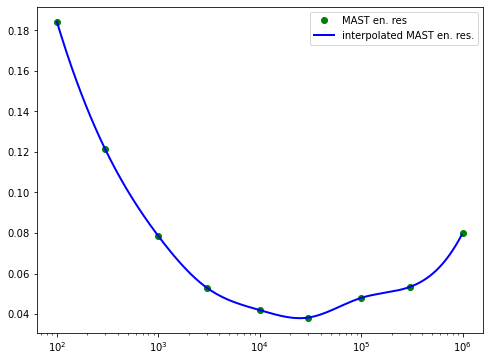

In [9]:
E = np.logspace(2, 5.99, 1000)
res = MAST_energy_resolution(E)


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(en_res[:,0], en_res[:,1],
         marker = 'o',
         linewidth = 0,
         color = 'g',
         label = 'MAST en. res')

plt.plot(E, res,
         marker = None,
         linewidth = 2,
         color = 'b',
         label = 'interpolated MAST en. res.')


plt.xscale("log")
# plt.yscale("log")

#ax.set_xlim(1.0e+04, 1.0e+05)
#ax.set_ylim(1.0e-09, 1.0e-07)
# ax.grid()
plt.legend(loc = 'upper right')
# fig.savefig('en_res_interpolated.pdf')

plt.show()

In [10]:
# def oscillated_spectrum(E):
#     return (modification_factor(E) * fermi_intrinsic(E))

In [11]:
def log_parabola(x, c, alpha, beta):
    E_0 = 5300.0 # MeV
    return(c * (x / E_0)**(-(alpha + beta*np.log(x/E_0))))

## Draw Fermi-LAT classic intrinsic spectrum without oscillations convolved with MAST energy resolution

In [12]:
# PRESET_FUNC = None
# # spectrum comvolved with MAST energy resolution
# def spectrum_convolved_one_point(energy):
#     global PRESET_FUNC
#     func = PRESET_FUNC
#     sigma = MAST_energy_resolution(energy) * energy
#     e = np.linspace(np.max(0, energy - 5.0*sigma), energy + 5.0*sigma, 1000)
#     res = np.exp(-(e - energy)**2 / (2.0 * sigma**2))
#     f = func(e) * res
#     return (simps(f, e) / simps(norm, e))
# #######################################################################################
# def spectrum_convolved(E, func = fermi_intrinsic):
#     global PRESET_FUNC
#     PRESET_FUNC = func
#     Energy = list(E)
#     f = np.array(list(map(spectrum_convolved_one_point, Energy)))
# #     N_true = simps(PRESET_FUNC(E), E)
# #     N_wrong= simps(f, E)
#     PRESET_FUNC = None
#     return (f)# * N_true / N_wrong)

In [13]:
# T_obs = 86400.0 * 365.0 * 10.0
# n_bins = 40
# n_theoretical_bins = 100
# E = np.logspace(2, 5, n_bins)
# space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
# e_right = 10.0**(np.log10(E) + space)
# e_left  = 10.0**(np.log10(E) - space)
# E_theory = np.logspace(2, 5, n_theoretical_bins)
# spectrum_null_hypothesis = fermi_intrinsic(E_theory)
# spectrum_alt_hypothesis = oscillated_spectrum(E_theory)
# fermi_photons = number_of_photons(E, func = fermi_intrinsic, delta_t = T_obs)
# modif_photons = number_of_photons(E, func = oscillated_spectrum, delta_t = T_obs)

In [14]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(1, 1, 1)

# # plt.plot(fermi[:,0], fermi[:,1] * fermi[:,0]**2,
# #          marker = '.',
# #          linewidth = 0,
# #          color = 'r',
# #          label = 'Fermi-LAT scanned')

# plt.plot(E_theory, spectrum_null_hypothesis * E_theory**2,
#          marker = None,
#          linewidth = 2,
#          color = 'b',
#          label = 'ideal intrinsic interpolated')

# plt.plot(E_theory, spectrum_alt_hypothesis * E_theory**2,
#          marker = None,
#          linewidth = 2,
#          color = 'tab:orange',
#          label = 'oscillated ideal spectrum interpolated')

# plt.plot(E, fermi_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0),
#          linewidth = 0,
#          marker = '.',
#          color = 'g',
#          label = 'convolved with en. res. classical photons')

# plt.plot(E, modif_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0),
#          linewidth = 0,
#          marker = '.',
#          color = 'tab:olive',
#          label = 'convolved with en. res. modif. with ALP osc. photons')


# plt.xscale("log")
# plt.yscale("log")

# plt.xlabel('Energy, MeV')
# plt.ylabel('SED, MeV cm$^{-2}$ s$^{-1}$')

# #ax.set_xlim(1.0e+04, 1.0e+05)
# #ax.set_ylim(1.0e-09, 1.0e-07)
# # ax.grid()
# plt.legend(loc = 'lower left')
# # fig.savefig('pure_spectrum_12_bins.pdf')

# plt.show()

## Model number of photons

In [15]:
def model_number_of_photons(E, c = 1.097273e-10,
                            alpha = 1.842097e+00,
                            beta = 1.077961e-01,
                            fermi_flag = False,
                            p_gamma = modification_factor,
                            delta_t = T_obs):
    space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
    e_right = 10.0**(np.log10(E) + space)
    e_left  = 10.0**(np.log10(E) - space)
    N = 10
    photons = list()
    for i in range(0, E.shape[0]):
        en = np.linspace(e_left[i], e_right[i], N)
        out = list()
        for j in range(0, N):
            sigma_en = MAST_energy_resolution(en[j]) * en[j]
            en_star = np.linspace(float(np.max([1.0, en[j] - 5.0*sigma_en])), en[j] + 5.0*sigma_en, 5*N)
            res = np.exp(-(en_star - en[j])**2 / (2.0 * sigma_en**2)) / np.sqrt(2.0 * np.pi * sigma_en**2)
            if fermi_flag == False:
                f = res*log_parabola(en_star, c, alpha, beta)*MAST_effective_area(en_star) * p_gamma(en_star)
            else:
                f = res * fermi_intrinsic(en_star) * MAST_effective_area(en_star)
            out.append(simps(f, en_star))
        out = np.array(out)
        photons.append(simps(out, en))
    return(np.array(photons) * delta_t)



# def number_of_photons(E, func = fermi_intrinsic, delta_t = T_obs):
#     space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
#     e_right = 10.0**(np.log10(E) + space)
#     e_left  = 10.0**(np.log10(E) - space)
#     N = 30
#     photons = list()
#     for i in range(0, E.shape[0]):
#         en = np.linspace(e_left[i], e_right[i], N)
#         out = list()
#         for j in range(0, N):
#             sigma = MAST_energy_resolution(en[j]) * en[j]
#             en_star = np.linspace(float(np.max([1.0, en[j] - 5.0*sigma])), en[j] + 5.0*sigma, N)
#             res = np.exp(-(en_star - en[j])**2 / (2.0 * sigma**2)) / np.sqrt(2.0 * np.pi * sigma**2)
#             f = res * func(en_star) * MAST_effective_area(en_star)
#             out.append(simps(f, en_star))
#         out = np.array(out)
#         photons.append(simps(out, en))
#     return(np.array(photons) * delta_t)

In [16]:
def optimize_model_for_ALP(E, data_to_optimize, p_gamma = modification_factor, delta_t = T_obs,
                           c_zero = 1.0e-10, alpha_zero = 2.0, beta_zero = 0.05):
    ##########################################################################################################
    # function to be optimized
    space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
    e_right = 10.0**(np.log10(E) + space)
    e_left  = 10.0**(np.log10(E) - space)
    def func_to_optimize(energy, c, alpha, beta):
        N = 10
        photons = list()
        for i in range(0, E.shape[0]):
            en = np.linspace(e_left[i], e_right[i], N)
            out = list()
            for j in range(0, N):
                sigma_en = MAST_energy_resolution(en[j]) * en[j]
                en_star = np.linspace(float(np.max([1.0, en[j] - 5.0*sigma_en])), en[j] + 5.0*sigma_en, 5*N)
                spec = log_parabola(en_star, c, alpha, beta) * p_gamma(en_star)
                res = np.exp(-(en_star - en[j])**2 / (2.0 * sigma_en**2)) / np.sqrt(2.0 * np.pi * sigma_en**2)
                f = res * spec * MAST_effective_area(en_star)
                out.append(simps(f, en_star))
            out = np.array(out)
            photons.append(simps(out, en))
        return(np.array(photons) * e_right / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0))
    ##########################################################################################################
    # perform the optimization
    y_data = data_to_optimize * e_right / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0) / delta_t
    err1 = data_to_optimize**0.5 * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0)
    err2 = 0.02*y_data
    err = np.sqrt(err1**2 + err2**2)
    popt, pcov = optimize.curve_fit(func_to_optimize, E, y_data,
                           p0 = [c_zero, alpha_zero, beta_zero],
                           sigma = err,
                           absolute_sigma = True)
    print("-----------------------------------------------------------------------------")
    print("The following parameters have been obtained:")
    print("c = {:e} +/- {:e}".format(popt[0], np.sqrt(np.diag(pcov)[0])))
    print("alpha = {:e} +/- {:e}".format(popt[1], np.sqrt(np.diag(pcov)[1])))
    print("beta = {:e} +/- {:e}".format(popt[2], np.sqrt(np.diag(pcov)[2])))
    ##########################################################################################################
    # calculate chi^2
    data_predicted_from_fit = func_to_optimize(E, popt[0], popt[1], popt[2])
    chi_sq = np.sum((y_data - data_predicted_from_fit)**2 / err**2)
    print("chi_sq = {:f}".format(chi_sq))
    return (popt, chi_sq)

In [17]:
n_bins = 120
n_theoretical_bins = 1200
E = np.logspace(2, 5, n_bins)
space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
e_right = 10.0**(np.log10(E) + space)
e_left  = 10.0**(np.log10(E) - space)
E_theory = np.logspace(2, 5, n_theoretical_bins)
spectrum_null_hypothesis = fermi_intrinsic(E_theory)
spectrum_alt_hypothesis = fermi_intrinsic(E_theory) * modification_factor(E_theory) #oscillated_spectrum(E_theory)
fermi_photons = model_number_of_photons(E, fermi_flag = True)

In [18]:
c, alpha, beta = optimize_model_for_ALP(E, fermi_photons, p_gamma = modification_factor, delta_t = T_obs,
                           c_zero = 1.097273e-10, alpha_zero = 1.842097e+00, beta_zero = 1.077961e-01)[0]

-----------------------------------------------------------------------------
The following parameters have been obtained:
c = 1.115896e-12 +/- 4.899340e-15
alpha = 2.262611e+00 +/- 4.054649e-03
beta = 1.086334e-01 +/- 1.121122e-03
chi_sq = 398.117850


In [19]:
# c, alpha, beta = optimize_model_for_ALP(E, fermi_photons, p_gamma = lambda u: 1.0, delta_t = T_obs,
#                            c_zero = 1.097273e-10, alpha_zero = 1.842097e+00, beta_zero = 1.077961e-01)[0]

In [20]:
model_photons = model_number_of_photons(E, c = c,
                        alpha = alpha,
                        beta = beta,
                        fermi_flag = False,
                        p_gamma = modification_factor,
                        delta_t = T_obs)

model = log_parabola(E_theory, c, alpha, beta) * E_theory**2
SED_fermi = fermi_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0)
err_fermi = np.sqrt((SED_fermi / fermi_photons**0.5)**2 + (0.02 * SED_fermi)**2)
SED_model = model_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0)

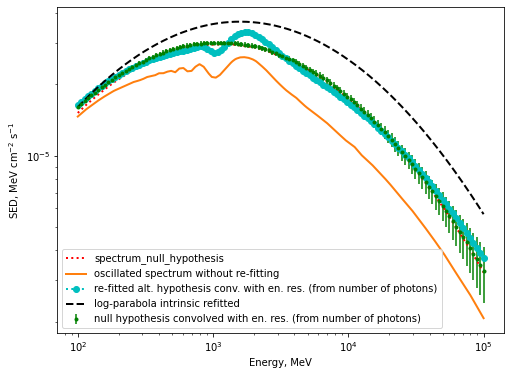

In [21]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1, 1, 1)

plt.plot(E_theory, spectrum_null_hypothesis * E_theory**2,
         marker = None,
         linewidth = 2,
         linestyle = 'dotted',
         color = 'r',
         label = 'spectrum_null_hypothesis')

plt.plot(E_theory, spectrum_alt_hypothesis * E_theory**2,
         marker = None,
         linewidth = 2,
         color = 'tab:orange',
         label = 'oscillated spectrum without re-fitting')

plt.errorbar(E, SED_fermi,
         xerr = None,
         yerr = err_fermi,
         fmt=".",
         color = 'g',
         label = 'null hypothesis convolved with en. res. (from number of photons)')

plt.plot(E, SED_model,
         linewidth = 2,
         linestyle = 'dotted',
         marker = 'o',
         color = 'c',
         label = 're-fitted alt. hypothesis conv. with en. res. (from number of photons)')

plt.plot(E_theory, model,
         linewidth = 2,
         linestyle = '--',
         marker = None,
         color = 'k',
         label = 'log-parabola intrinsic refitted')

plt.xscale("log")
plt.yscale("log")

plt.xlabel('Energy, MeV')
plt.ylabel('SED, MeV cm$^{-2}$ s$^{-1}$')

#ax.set_xlim(1.0e+04, 1.0e+05)
#ax.set_ylim(1.0e-09, 1.0e-07)
# ax.grid()
plt.legend(loc = 'lower left')
# fig.savefig('fit-test_2neV_1e-10GeV-1.pdf')

plt.show()

## Read data with modification factors for 11x11 models

In [23]:
full_data = np.loadtxt('Result-Many.txt')

In [24]:
axion_mass = full_data[:,0][0:(11*100-1):101]
print(axion_mass)

[1.000000e-10 1.995262e-10 3.981072e-10 7.943282e-10 1.584893e-09
 3.162278e-09 6.309573e-09 1.258925e-08 2.511886e-08 5.011872e-08
 1.000000e-07]


In [25]:
axion_g = full_data[:,1][0:(full_data[:,1].shape[0]):(11*101)]
print(axion_g)

[3.981072e-10 1.995262e-10 1.000000e-10 5.011872e-11 2.511886e-11
 1.258925e-11 6.309573e-12 3.162278e-12 1.584893e-12 7.943282e-13
 3.981072e-13]


In [26]:
def modification_factor_table(m, g):
    full_data = np.loadtxt('Result-Many.txt')
    temp1 = np.where(full_data[:,0] == m)[0]
    temp2 = np.where(full_data[temp1][:,1] == g)[0][0]
    ind = temp1[temp2]
    if (ind is None):
        print("Cannot find m = {:e} or g = {:e}".format(m, g))
        return None
    else:
        out = full_data[(ind + 1):(ind + 101)]
        out[:,0] = out[:,0] * 1.0e-06 # eV -> MeV
        for i in range(0, out[:,1].shape[0]):
            if out[i,1] < 0.4:
                out[i,1] = 0.999999
        filt = np.mean(out[:,1])
        for i in range(0, out[:,1].shape[0]):
            if ((filt >= 0.88) and (out[i,1] < filt)):
                out[i,1] = out[90, 1]#0.9500000000
        return(out)

In [27]:
scanned_modif = list()
for i in range(0, axion_mass.shape[0]):
    for j in range(0, axion_g.shape[0]):
        scanned_modif.append(modification_factor_table(axion_mass[i], axion_g[j]))

## Create the interpolation function for the modification factor

In [28]:
modif_func_list_support = list()
for mod in scanned_modif:
    modif_func_list_support.append(interpolate.interp1d(np.log10(mod[:,0]),
                                                        mod[:,1],
                                                        kind='linear',
                                                        bounds_error = False,
                                                        fill_value = 'extrapolate'))

In [29]:
def gamma_ALP_modification_factor(E, number_m, number_g):
    ind = 11*number_m + number_g
    return(modif_func_list_support[ind](np.log10(E)))

In [30]:
# Eee = np.logspace(2, 5, 100)
# m_fac = gamma_ALP_modification_factor(Eee,
#                                       np.where(axion_mass == 3.981072e-10)[0][0],
#                                       np.where(axion_g == 3.162278e-12)[0][0])
# print m_fac

## Get optimization results

In [ ]:
n_bins = 120
n_theoretical_bins = 1200
E = np.logspace(2, 5, n_bins)
space = np.mean((np.log10(E[1:]) - np.log10(E[:-1]))/2.0)
e_right = 10.0**(np.log10(E) + space)
e_left  = 10.0**(np.log10(E) - space)
E_theory = np.logspace(2, 5, n_theoretical_bins)
spectrum_null_hypothesis = fermi_intrinsic(E_theory)
fermi_photons = model_number_of_photons(E, fermi_flag = True)
SED_fermi = fermi_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0)
err_fermi = np.sqrt((SED_fermi / fermi_photons**0.5)**2 + (0.02 * SED_fermi)**2)

In [ ]:
spectrum_optimization_results = list()
for n_m in range(0, axion_mass.shape[0]):
    for n_g in range(0, axion_g.shape[0]):
        spectrum_optimization_results.append(optimize_model_for_ALP(E, fermi_photons,
                                                p_gamma=(lambda x: gamma_ALP_modification_factor(x,n_m,n_g)),
                                                delta_t = T_obs,
                                                c_zero = 1.097273e-10,
                                                alpha_zero = 1.842097e+00,
                                                beta_zero = 1.077961e-01))

## Draw graphs

In [ ]:
#beautiful colors
col = [u'#1f77b4', u'#ff7f0e', 
       u'#2ca02c', u'#d62728', 
       u'#9467bd', u'#8c564b', 
       u'#e377c2', u'#7f7f7f', 
       u'#bcbd22', 'm',
       u'#0f0f0f', 'c']

In [ ]:
for n_m in range(0, axion_mass.shape[0]):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1, 1, 1)
    for n_g in range(0, axion_g.shape[0]):
    #for n_g in range(0, 4):
        c = spectrum_optimization_results[11*n_m + n_g][0][0]
        alpha = spectrum_optimization_results[11*n_m + n_g][0][1]
        beta = spectrum_optimization_results[11*n_m + n_g][0][2]
        model_photons = model_number_of_photons(E, c = c,
                        alpha = alpha,
                        beta = beta,
                        fermi_flag = False,
                        p_gamma = (lambda x: gamma_ALP_modification_factor(x, n_m, n_g)),
                        delta_t = T_obs)
        
        SED_model = model_photons * e_right / T_obs / MAST_effective_area(E) / (10.0**(2.0*space) - 1.0)
        
        plt.plot(E, SED_model,
                 linewidth = 1,
                 linestyle = '-',
                 color = col[n_g],
                 label = 'g = {:.2e}'.format(axion_g[n_g]) + 'GeV$^{-1}$')
        
    plt.errorbar(E, SED_fermi,
         xerr = None,
         yerr = err_fermi,
         fmt=".",
         color = 'g',
         label = 'no oscillations spectrum')

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel('Energy, MeV')
    plt.ylabel('SED, MeV cm$^{-2}$ s$^{-1}$')
    plt.title('m = {:.2e} eV'.format(axion_mass[n_m]))

    plt.legend(loc = 'lower left')
#     fig.savefig('graphs/m={:.2e}_v5.pdf'.format(axion_mass[n_m]))
#     fig.savefig('graphs/m={:.2e}_v5.png'.format(axion_mass[n_m]))
    #plt.show()

## Statistical analysis
See [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html?highlight=scipy%20stats%20chi2%20interval)

In [ ]:
chi_sq_results = list()
for res in spectrum_optimization_results:
    chi_sq_results.append(res[1])
chi_sq_results = np.array(chi_sq_results)

In [ ]:
number_of_degrees_of_freeedom = 114 # 120 bins - 3 spectral parameters - axion_mass - axion_g - 1
p_values = 1.0 - stats.chi2.cdf(chi_sq_results, number_of_degrees_of_freeedom)
print(p_values)

In [ ]:
stats.norm.ppf(1.0 - 0.045 / 2.0)

In [ ]:
sigmas = stats.norm.ppf(1.0 - p_values / 2.0)
for i in range(0, sigmas.shape[0]):
    if sigmas[i] < 0.0:
        sigmas[i] = 0.0
    if sigmas[i] > 5.0:
        sigmas[i] = 5.0
print(sigmas)

In [ ]:
sigma_color_list = list()
for i in range(0, sigmas.shape[0]):
#     if sigmas[i] >= 5.0:
#         sigma_color_list.append('r')
#     if (sigmas[i] >= 3.0 and sigmas[i] < 5.0):
#         sigma_color_list.append('tab:orange')
#     if (sigmas[i] >= 2.0 and sigmas[i] < 3.0):
#         sigma_color_list.append('y')
    if sigmas[i] < 2.0:
        sigma_color_list.append('k')
    if sigmas[i] >= 2.0:
        sigma_color_list.append('r')

## Draw results

In [ ]:
fig = plt.figure(figsize=(8,6), dpi=600)
ax = fig.add_subplot(1, 1, 1)

for n_m in range(0, axion_mass.shape[0]):
    for n_g in range(0, axion_g.shape[0]):
        plt.plot(axion_mass[n_m],
                 axion_g[n_g],
                 color = sigma_color_list[11*n_m + n_g],
                 marker = 'o')

plt.xscale("log")
plt.yscale("log")

plt.xlabel('$m_{ALP}$ [eV]')
plt.ylabel('$g_{ALP}$ [GeV$^{-1}$]')

#ax.set_xlim(1.0e+04, 1.0e+05)
#ax.set_ylim(1.0e-09, 1.0e-07)
# ax.grid()
# plt.legend(loc = 'lower left')
# fig.savefig('statistical_analysis_outdir/exclusion_region_results_v6.pdf')

plt.show()

In [ ]:
# np.savetxt('statistical_analysis_outdir/sigmas_v6.txt', sigmas, fmt='%1.6e')
# np.savetxt('statistical_analysis_outdir/axion_mass_v6.txt', axion_mass, fmt='%1.6e')
# np.savetxt('statistical_analysis_outdir/axion_g_v6.txt', axion_g, fmt='%1.6e')